# Analyzing results

We will use python and this jupyter notebook to plot and analyze the results obtained from the
fortran source code.

## Plotting results

For this we will use the `numpy` and `matplotlib.pyplot` packages

In [1]:
# Importing numpy and matplotlib
import numpy as np 
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import f90nml

In [2]:
# different styles are predefined that give different appearance to the plots. This one emulates the style of 
# the figures you'll find on statisical analysis news site fivethirtyeight.com
plt.style.use('fivethirtyeight')
#plt.style.use('seaborn')

# Electric Potential

In [3]:
# reading data stored in poisson.dat

file_name = 'poisson.dat'

# loadtxt reads all the data in a file and stores them in an array (assuming it's all floats)
# we use skiprows=1 to avoid the header
all_data = np.loadtxt(file_name,skiprows=2)

# We transpose the array in order to be able to extract each column individually
all_data = all_data.transpose()

x_points = all_data[0]
y_points = all_data[1]
potential = all_data[2]


### Plot the Electric Potential

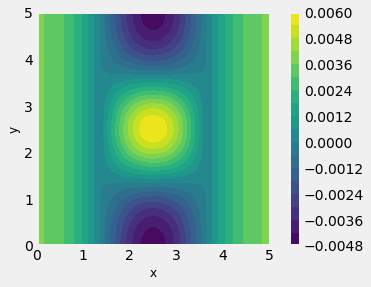

In [4]:
fig, ax = plt.subplots()

# Interpolate potential data to x, y coordinates.
z = griddata((x_points, y_points), potential, (x_points[None,:], y_points[:,None]), method='linear')

# Plotting the potential
plt.contourf(x_points, y_points, z, 20)

# Plot Settings
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.axis('scaled')

plt.colorbar()

plt.show()


# Series vs Parallel Comparison

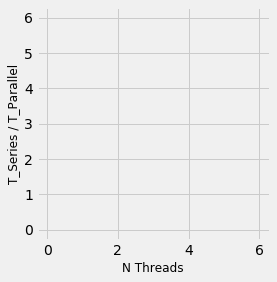

In [5]:
fig, ax = plt.subplots()

# Plotting the Series vs Parallel Comparison Averaged over 10 runs for each

# Plot Settings
plt.xlabel('N Threads', fontsize=12)
plt.xlim(0, 6)

plt.ylabel('T_Series / T_Parallel', fontsize=12)
plt.ylim(0, 6)
plt.axis('scaled')

plt.show()
